<h1>Exploration des données des mutations WES du myelome multiples données issues DU papier théranostic 2019</h1>
Mutations ponctuelles pour plusieurs lignées cellulaires

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
f=open("/home/buffard/Seafile/data/table_S4_mutations.csv","r")
f.readline()
cell_lines={}
genes=set()

df_mutations=pd.read_csv("/home/buffard/Seafile/data/table_S4_mutations.csv",sep=";")
df_mutations


,Sample,Gene,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Amino_Acid_Change,Nucleotide_Change
0,AMO1,ERBB3,chr12,56487560,56487560,Missense_Mutation,SNP,p.K498I,c.A1493T
1,L363,CARM1,chr19,10982400,10982400,In_Frame_Ins,INS,p.V8delinsAV,c.22_23insCGG
2,L363,CALR,chr19,13051094,13051094,Missense_Mutation,SNP,p.R177Q,c.G530A
3,L363,CRTC1,chr19,18887981,18887981,Missense_Mutation,SNP,p.V581G,c.T1742G
4,L363,CNOT3,chr19,54656620,54656620,Missense_Mutation,SNP,p.N641D,c.A1921G
...,...,...,...,...,...,...,...,...,...
572,XG7,MN1,chr22,28194962,28194962,In_Frame_Ins,INS,p.Q524delinsHQ,c.1569_1570insCAT
573,AMO1,KRAS,chr12,25378562,25378562,Missense_Mutation,SNP,p.A146T,c.G436A
574,L363,TRAF7,chr16,2220636,2220636,Missense_Mutation,SNP,p.R85C,c.C253T
575,OPM2,NCOR2,chr12,124817000,124817000,Missense_Mutation,SNP,p.K2257E,c.A6769G


Text(0, 0.5, 'Number of nucleotide mutation')

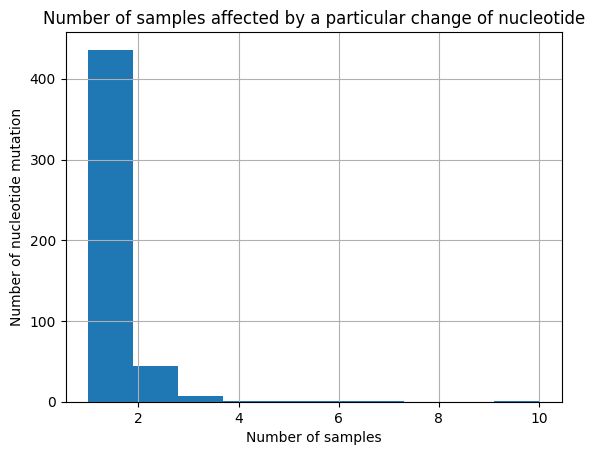

In [3]:
#print(df_mutations.groupby(['Gene','Nucleotide_Change']).value_counts().head(20))
fig=(df_mutations.groupby(['Gene','Nucleotide_Change'])['Sample'].nunique().hist())
fig.set_title("Number of samples affected by a particular change of nucleotide")
fig.set_xlabel("Number of samples")
fig.set_ylabel("Number of nucleotide mutation")


In [4]:
sorted_count_mutations=df_mutations.groupby(['Gene','Nucleotide_Change'])['Sample'].nunique().reset_index(name='count').sort_values(['count'], ascending=False)
sorted_count_mutations

,Gene,Nucleotide_Change,count
87,CNOT3,c.A1921G,10
88,CNOT3,c.A1922G,7
478,USP6,c.C1366T,6
140,EZH2,c.G553C,5
418,SETD2,c.G3240A,4
...,...,...,...
165,FAM46C,c.C906G,1
164,FAM46C,c.C877G,1
163,FAM46C,c.C874T,1
162,FAM46C,c.C276G,1


In [5]:
sorted_count_mutations.nsmallest(4, 'count',keep='all') #4 est ignoré car l'agrument keep='all'

,Gene,Nucleotide_Change,count
334,NRAS,c.G35C,1
264,MAF,c.C826T,1
265,MAF,c.C953T,1
336,NRG1,c.A1027G,1
283,MKL1,c.1690_1695del,1
...,...,...,...
165,FAM46C,c.C906G,1
164,FAM46C,c.C877G,1
163,FAM46C,c.C874T,1
162,FAM46C,c.C276G,1


conclusions 492 mutations différentes dont 436 qui ne se retrouve que dans une seule lignée ( 89%)

<h1>Exploration du changement d'acides aminés produits par les mutations</h1>

Text(0, 0.5, 'Number of amino acid changes')

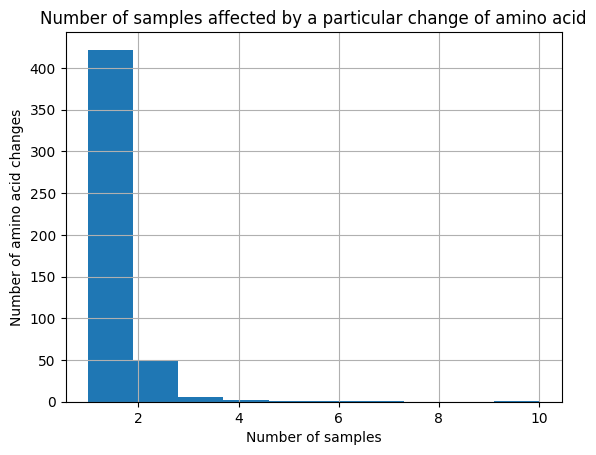

In [6]:
sorted_count_mutations=df_mutations.groupby(['Gene','Amino_Acid_Change'])['Sample'].nunique().reset_index(name='count').sort_values(['count'], ascending=False)
sorted_count_mutations
fig=(df_mutations.groupby(['Gene','Amino_Acid_Change'])['Sample'].nunique().hist())
fig.set_title("Number of samples affected by a particular change of amino acid")
fig.set_xlabel("Number of samples")
fig.set_ylabel("Number of amino acid changes")

In [7]:
sorted_count_mutations.nsmallest(4, 'count',keep='all')

,Gene,Amino_Acid_Change,count
306,MYO5A,p.E1090K,1
315,NF1,p.G2816E,1
321,NOTCH2,p.H2032N,1
302,MYH11,p.D553E,1
320,NOTCH2,p.D1760N,1
...,...,...,...
165,FAM46C,p.Y304F,1
164,FAM46C,p.Y304C,1
161,FAM46C,p.S302R,1
160,FAM46C,p.S198fs,1


conclusion 484 changements d'acides aminés dont 422 uniques (87%)

<h2>Transformation des données</h2>
Les données sont organisées avec chaque mutation dans chaque lignée cellulaire par ligne.
On les transforme pour avoir en colonne les genes concernés par des mutations et en ligne chaque lignée
Si une mutation quelle qu'elle soit est présente dans un gene dans une lignée alors je donne la valeur 1
Au contraire s'il n'y a aucune mutation décrite dans les données, j'attribue un 0


In [9]:
f=open("/home/buffard/Seafile/data/table_S4_mutations.csv","r")
f.readline()
cell_lines={}
genes=set()
for line in f:
    column=line.split(";")
    if column[0] in cell_lines:
        cell_lines[column[0]].append(column[1])
    else:
        cell_lines.update({column[0]:[column[1]]})
    genes.add(column[1])
f.close()

g=open("cell_lines_mutations_matrix.csv","w")
g.write("samples;")
for gene in genes:
    g.write(gene+";")
g.write("\n")

names=np.array([])
print (len(genes))

Y=list()
for cell_line in cell_lines.keys():
    g.write(cell_line+";")
    X=[]
    
    names=np.append(names,cell_line)
    for gene in genes:
        if gene in cell_lines[cell_line]:
            g.write("1;")
            X.append(1)
        else:
            g.write("0;")
            X.append(0)
    
    g.write("\n")
    Y.append(X)

g.close()

matrix=np.array(Y)
df= pd.DataFrame(matrix, index=cell_lines.keys(),columns=list(genes))

    

236


<h1>Exploration des données de mutation réduite aux gènes </h1>


AMO1     20
L363     18
Lopra    13
LP1      14
MM1S     22
MOLP2    20
MOLP8    25
OPM2     28
RPMI     23
SKMM2    16
XG1       8
XG11     16
JJN3     13
XG12     12
XG13     23
XG16      8
XG19     17
XG2      15
XG20     18
XG23     17
XG24     21
XG25     19
XG26     12
XG27     12
XG28     11
XG29     11
XG30     18
XG5      14
XG6      29
XG7      17
dtype: int64


[Text(0.5, 0, 'mutation number'),
 Text(0, 0.5, 'sample count'),
 Text(0.5, 1.0, 'Mutation number per sample')]

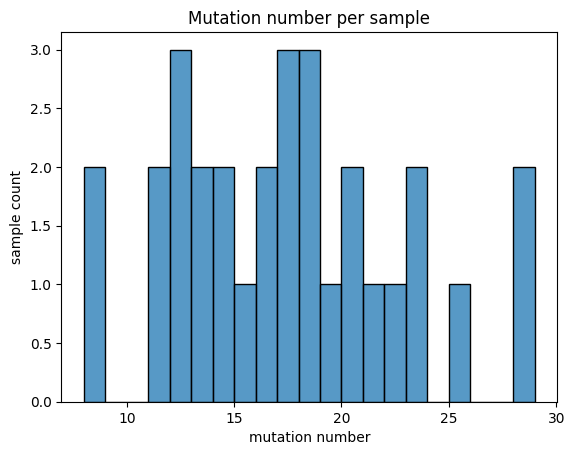

In [10]:
count_mutation=df.sum(axis=1)
print(count_mutation)

df2=df.assign(count=df.sum(axis=1))


fg=sns.histplot(df2, x="count",binwidth=1,bins=range(0,30,1))
fg.set(xlabel='mutation number',
       ylabel='sample count',
       title='Mutation number per sample')

        occurence
EIF1AX          1
FGF3            1
PIK3CB          1
BIRC3           1
FUBP1           1
...           ...
MET             1
STAT6           1
TAF15           1
BTG1            1
NTRK1           1

[126 rows x 1 columns]


[Text(0.5, 0, 'Number of samples'),
 Text(0, 0.5, 'Genes mutated number'),
 Text(0.5, 1.0, 'Number of samples affected by a particular gene mutated')]

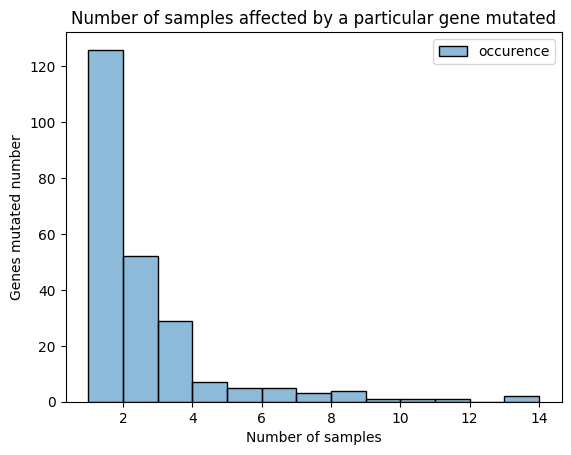

In [11]:
count_mutation=df.sum(axis=0)

df3=pd.DataFrame(count_mutation,columns=["occurence"])

print(df3.nsmallest(4, 'occurence',keep='all'))
fg=sns.histplot(df3,binwidth=1,bins=range(0,30,1))
fg.set(xlabel='Number of samples',
       ylabel='Genes mutated number',
       title='Number of samples affected by a particular gene mutated')

126 genes mutés dans une seule lignée, ces gènes n'apportent rien pour le clustering

<h2>Test des clustering sur les gènes mutés</h2>


1) avec les paramètres par défault du clustering hierachique

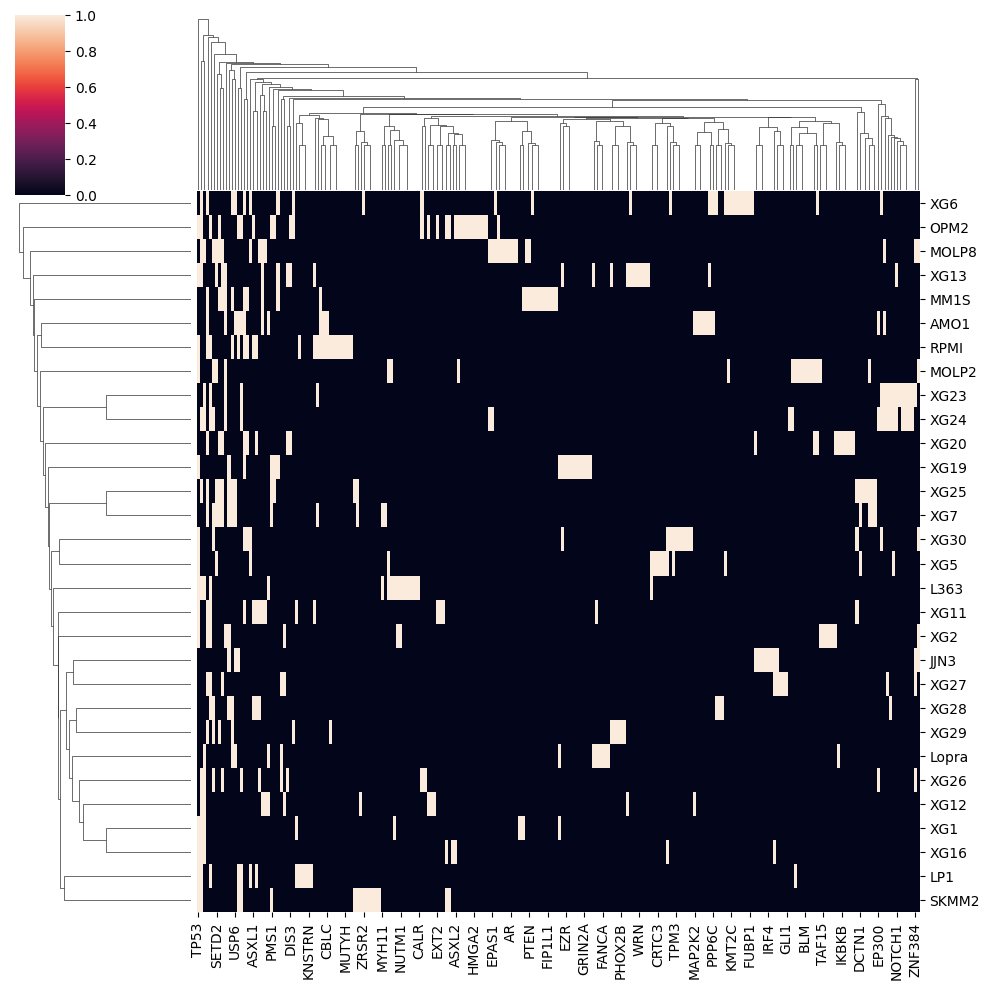

In [12]:
hierachic_cluster=sns.clustermap(df)
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering.png") 

2) Avec la métrique de Hamming mieux adaptée au données bolléennes

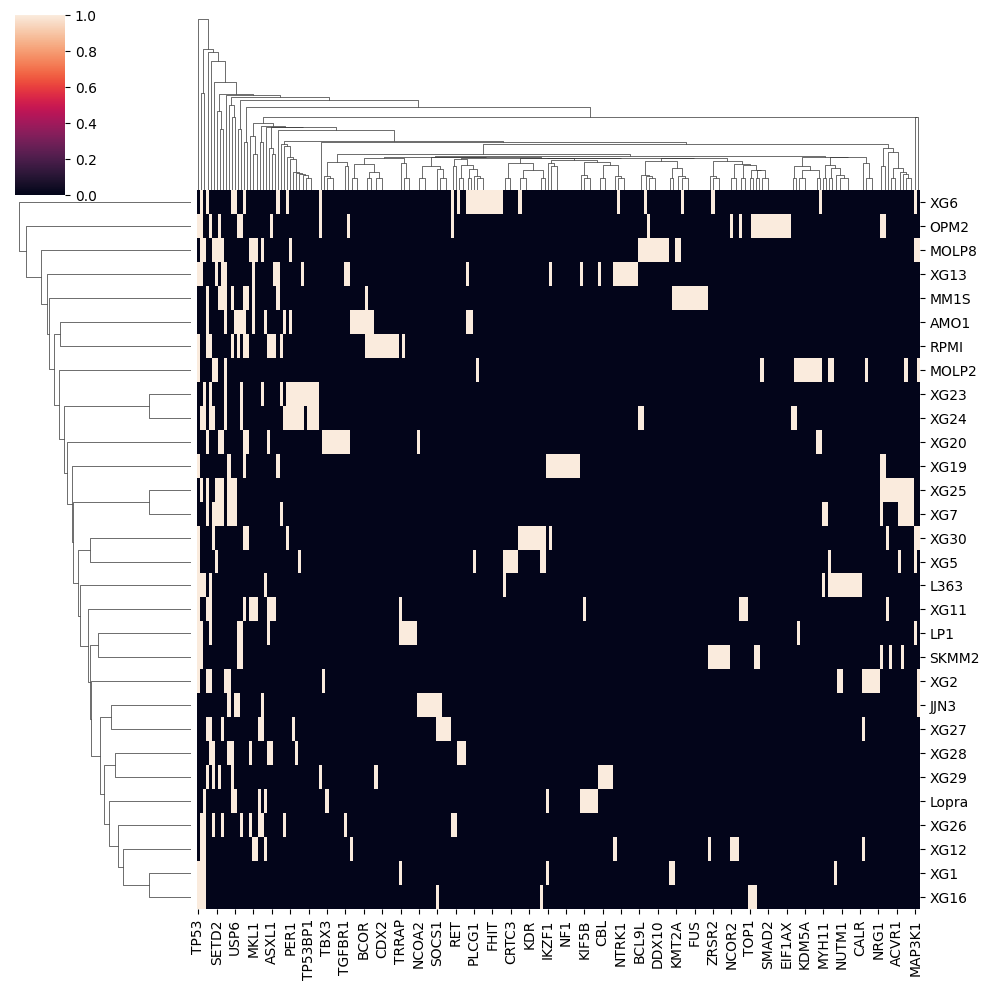

In [13]:
hierachic_cluster=sns.clustermap(df,metric='hamming')
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering.png") 


In [ ]:
from scipy.spatial.distance import hamming
print(len(df.axes[0]))
dist=[]
for i in range(0,len(df.axes[0])-2):
    for j in range(i+1,len(df.axes[0])-1):
        row1=df.iloc[i]
        #print(df.iloc[i])
        row2=df.iloc[j]
        dist.append(hamming(row1, row2))
df_hamming = pd.DataFrame(dist, columns=["hamming_distance"])
sns.histplot(df_hamming, x="hamming_distance",kde=True)
plt.show() 
sns.ecdfplot(df_hamming, x="hamming_distance")
plt.show()  
hierachic_cluster=sns.clustermap(df,xticklabels=True,metric = "hamming")
for tickLabel in hierachic_cluster.ax_heatmap.get_xticklabels():
  tickLabel.set_fontsize(6)
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering_reduced_hammingDistance.png") 

3) Tests avecKmeans
Réalisation d'une courbe Elbow 

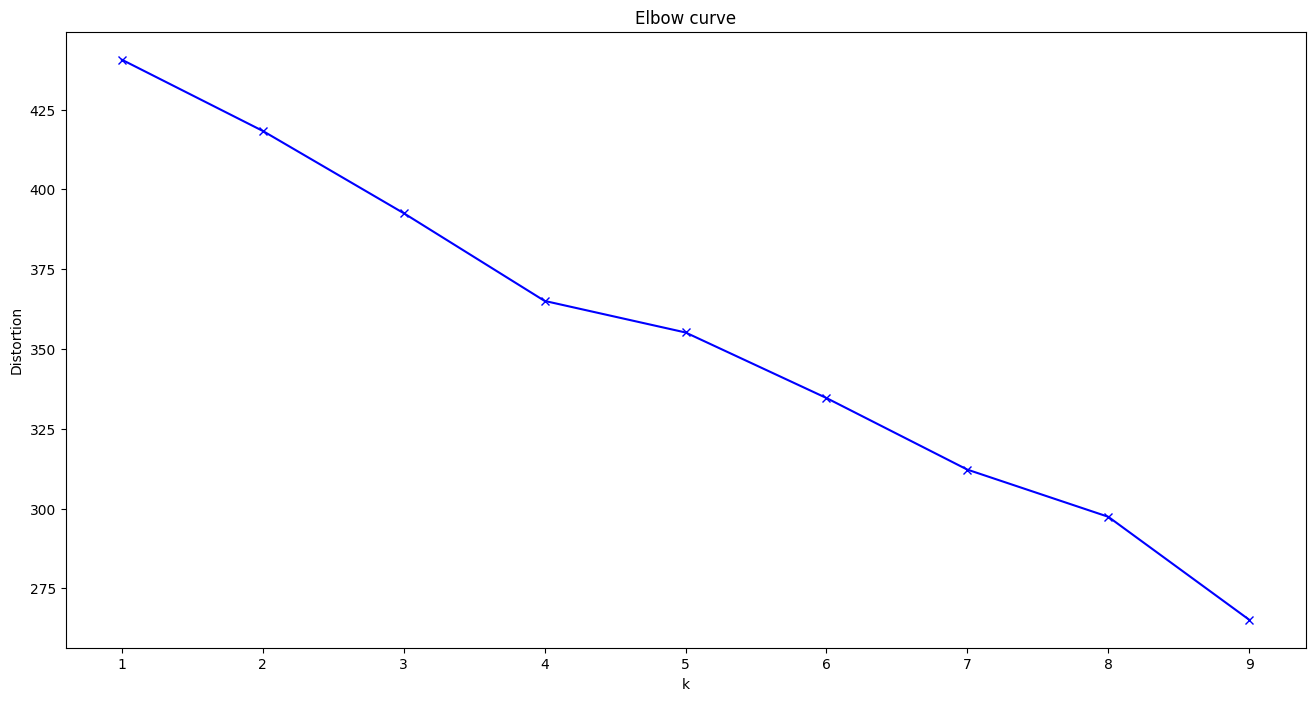

In [14]:
distortions = []
K=range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()


Conclusion : pas de point d'inflexion marqué pour Kmeans

4) Tests avec KMedoids
Courbe Elbow 

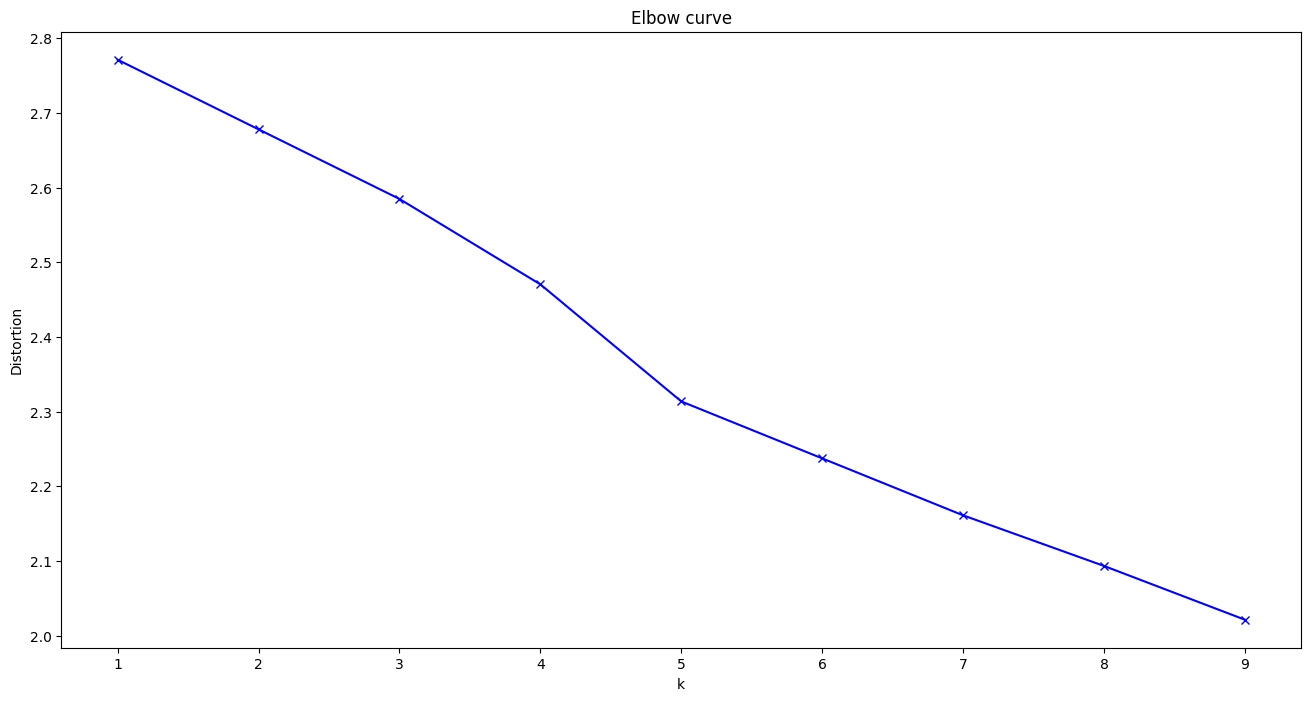

In [15]:
from sklearn_extra.cluster import KMedoids
distortions = []
K=range(1,10)
for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=0,metric='hamming',).fit(df)
    distortions.append(kmedoids.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()


Conclusion : pas de point d'inflexion marqué pour KMedoid

30


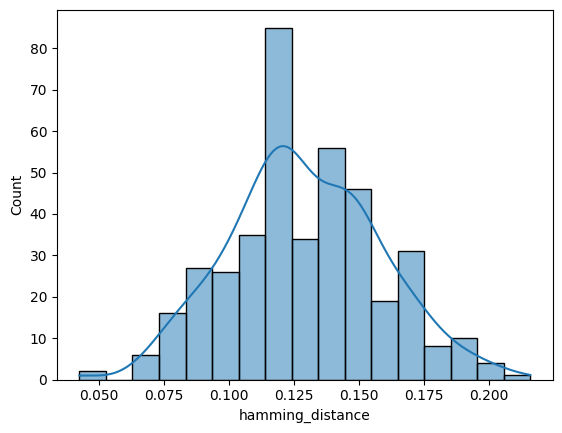

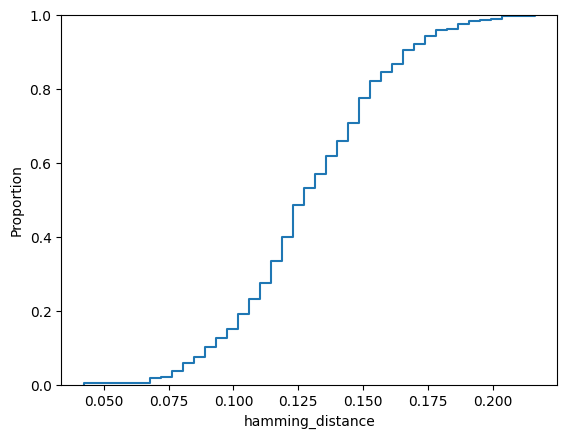

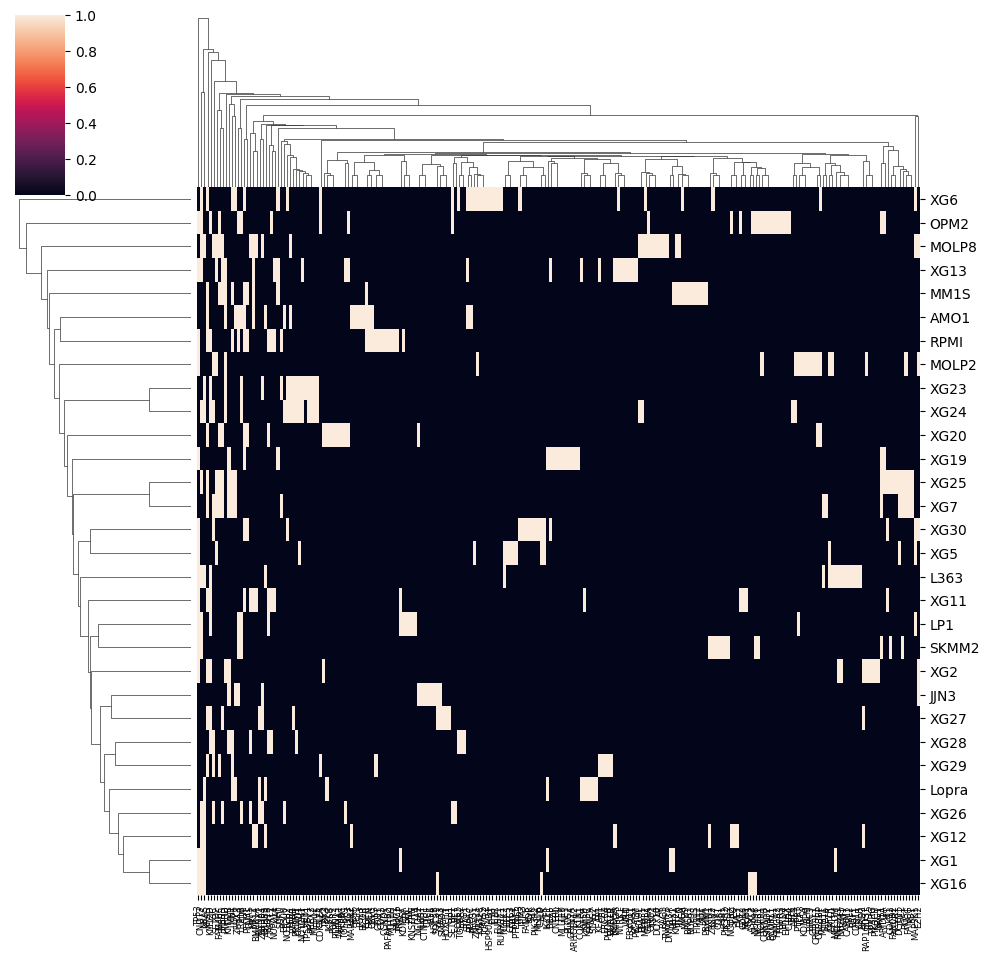

Conclusion : la réalisation d'un clustering hierarchique ne donne pas de groupe chaque lignée étant très différente sur les 236 gènes contenant des mutations.

<H1>Filtrage des données</H1>
Supression des mutations qui ne sont présentes que dans occurence_number lignées
et réalisation de clustering hierarchique avec la distance de hamming

In [17]:
#list of unique occurence mutations
occurence_number=5

df_reduced=df.drop(df3[df3["occurence"] <=occurence_number].index,axis=1)


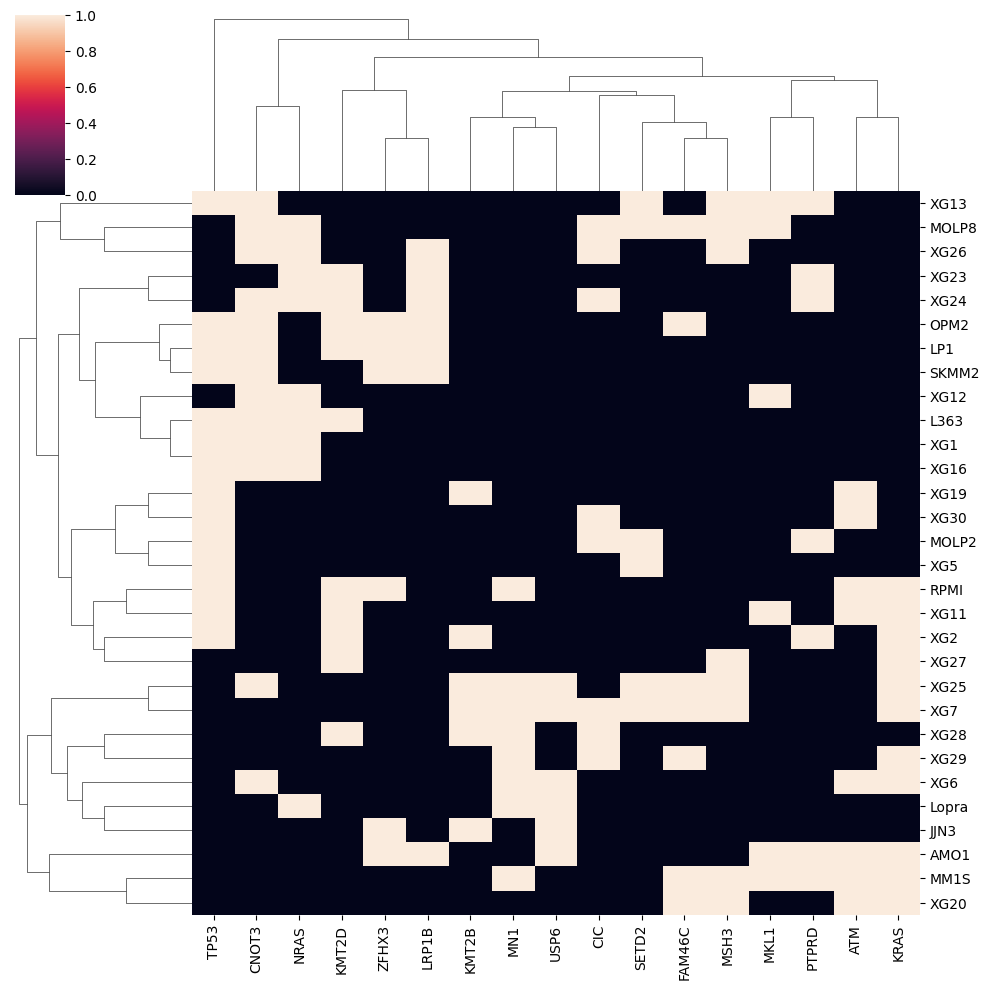

In [18]:
hierachic_cluster=sns.clustermap(df_reduced,xticklabels=True,metric='hamming',col_cluster=True)
for tickLabel in hierachic_cluster.ax_heatmap.get_xticklabels():
  tickLabel.set_fontsize(10)
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering_reduced-"+str(occurence_number)+"_hamming.png") 


save file with genes selected

In [19]:
print(df_reduced.columns)
f=open("list_gene_reduced"+str(occurence_number)+".tsv","w")
for gene in df_reduced.columns:
    f.write(gene+"\t")
f.close()

Index(['ZFHX3', 'MKL1', 'PTPRD', 'FAM46C', 'MN1', 'CIC', 'USP6', 'KMT2D',
       'CNOT3', 'ATM', 'KMT2B', 'KRAS', 'LRP1B', 'SETD2', 'MSH3', 'TP53',
       'NRAS'],
      dtype='object')
